<a href="https://colab.research.google.com/github/AriyantGit/Handwritten-digit-recognition-Mnist-DataSet/blob/main/minist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt

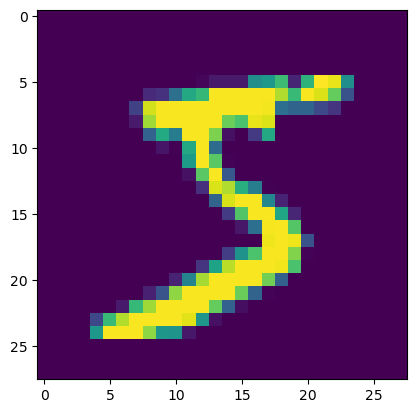

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
from keras.utils import to_categorical

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(10,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 4ms/step - loss: 0.3899 - accuracy: 0.8835 - val_loss: 0.1765 - val_accuracy: 0.9446
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2015 - accuracy: 0.9389 - val_loss: 0.1172 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1607 - accuracy: 0.9507 - val_loss: 0.1048 - val_accuracy: 0.9674
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1399 - accuracy: 0.9570 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1273 - accuracy: 0.9609 - val_loss: 0.0919 - val_accuracy: 0.9723
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1183 - accuracy: 0.9634 - val_loss: 0.0913 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1103 - accuracy: 0.9660 - val_loss: 0.0952 - val_accuracy

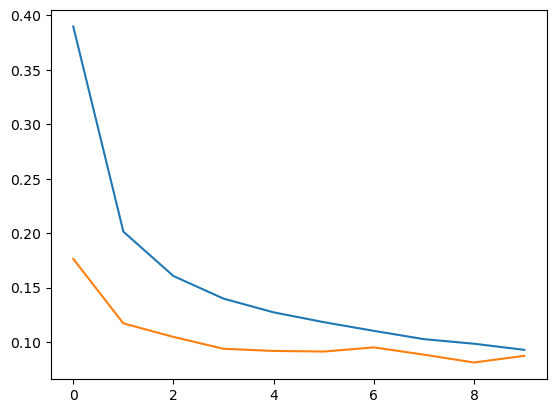

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9743

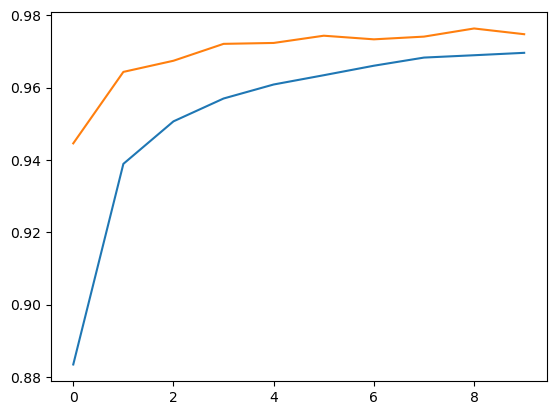

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

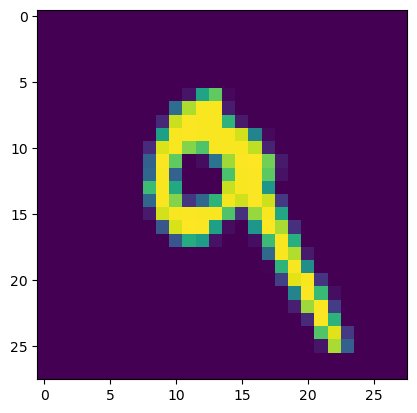

In [20]:
plt.imshow(X_test[7])

In [21]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 47ms/step


array([9], dtype=int64)

In [23]:
model.save("HMnist.keras")